## Imports

In [22]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# import sklearn libararies
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

## Read Data

In [23]:
df1 = pd.read_csv('train.csv')
df1

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
0,0,335.160105,-9999.00000,-9999.0,-9999.0,-9999.000000,-9999.000000,-9999.000000,5.32740,-9999.000000,-9999.00000,-9999.000000,-9999.000000,-9999.00000,-9999.000000,-9999.0,-9999.0000
1,0,335.660105,-9999.00000,-9999.0,-9999.0,-9999.000000,-9999.000000,-9999.000000,5.82350,-9999.000000,-9999.00000,-9999.000000,-9999.000000,-9999.00000,-9999.000000,-9999.0,-9999.0000
2,0,336.160105,-9999.00000,-9999.0,-9999.0,-9999.000000,-9999.000000,-9999.000000,6.52280,-9999.000000,-9999.00000,-9999.000000,-9999.000000,-9999.00000,-9999.000000,-9999.0,-9999.0000
3,0,336.660105,-9999.00000,-9999.0,-9999.0,-9999.000000,-9999.000000,-9999.000000,7.22850,-9999.000000,-9999.00000,-9999.000000,-9999.000000,-9999.00000,-9999.000000,-9999.0,-9999.0000
4,0,337.160105,-9999.00000,-9999.0,-9999.0,-9999.000000,-9999.000000,-9999.000000,9.50200,-9999.000000,-9999.00000,-9999.000000,-9999.000000,-9999.00000,-9999.000000,-9999.0,-9999.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318962,8,12142.500000,64.57612,-9999.0,8.5,8.550179,2.613020,0.026474,32.91600,0.109335,5.20765,4.081079,3.646631,10.43060,0.028313,1.0,0.2736
318963,8,12143.000000,66.20669,-9999.0,8.5,8.520521,2.614332,0.024994,28.76523,0.099368,5.23046,4.120065,3.936356,9.47309,0.027530,1.0,0.2344
318964,8,12143.500000,67.43187,-9999.0,8.5,8.521563,2.620479,0.027400,25.70403,0.097774,5.33586,4.662224,4.245169,8.96010,0.023795,1.0,0.2054
318965,8,12144.000000,66.56465,-9999.0,8.5,8.522397,2.623435,0.027175,22.94222,0.089295,5.34635,4.810604,4.372118,8.80637,0.022048,1.0,0.1793


## Exploratory Data Analysis

In [24]:
# For this tutorial, we only use five measurements (DEN, GR, NEU, PEF, RDEP) as input, 
# you should determine which measurements to include in your model. 
col_names =  ['DEN', 'GR', 'NEU', 'PEF', 'RDEP'] + list(df1.columns.values[-3:])

# Replace -9999 with np.nan
df1.replace(['-9999', -9999], np.nan, inplace=True)

# remove all rows that contains missing value 
df1.dropna(axis=0, subset=col_names, inplace=True)
df1.describe()

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
count,40192.000000,40192.000000,17431.000000,7198.000000,40192.0,40192.000000,40192.000000,40192.000000,40192.000000,40192.000000,40192.000000,40192.000000,40192.000000,40095.000000,40192.000000,40192.000000,40192.000000
mean,5.214097,12131.009069,76.387879,131.021627,8.5,8.619387,2.409845,0.045924,39.125645,0.180881,5.184719,26.176997,786.812442,23.429062,0.141709,0.659258,0.270545
std,2.048252,1557.909101,12.316714,14.551402,0.0,0.085309,0.162669,0.022640,24.113147,0.066023,1.719874,450.550713,6788.718199,7.759622,0.082093,0.356411,0.199761
min,1.000000,8494.000000,48.927400,74.822400,8.5,8.304600,1.626600,-0.487100,4.588597,-0.003400,-0.013100,0.129500,0.139400,0.337400,0.001000,0.013000,0.000000
25%,4.000000,11154.200000,68.283905,123.151225,8.5,8.556900,2.260500,0.034900,19.375475,0.143200,4.578875,1.580900,1.648675,18.815850,0.066265,0.292000,0.111000
50%,6.000000,11837.270000,74.653000,131.898800,8.5,8.625000,2.415900,0.048200,34.891350,0.176100,5.414550,3.012420,3.544636,24.980200,0.142000,0.779600,0.227000
75%,6.000000,13115.810000,83.365020,138.538250,8.5,8.671900,2.546500,0.060100,51.051675,0.215300,6.099000,9.455600,11.557955,29.913200,0.218000,1.000000,0.354025
max,8.000000,15566.930000,123.253500,193.840200,8.5,9.175000,3.089600,0.257450,129.343000,0.579414,13.356600,80266.800000,62290.800000,46.895400,0.403294,1.000000,1.000000


### Removing the Outliers


In [25]:
# Remove anomlay
clf = IsolationForest(random_state=0).fit_predict(df1[col_names])
df1 = df1[clf==1]
df1.describe()

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
count,35046.000000,35046.000000,14682.000000,6088.000000,35046.0,35046.000000,35046.000000,35046.000000,35046.000000,35046.000000,35046.000000,35046.000000,35046.000000,34949.000000,35046.000000,35046.000000,35046.000000
mean,5.213919,12193.706991,75.426260,131.801632,8.5,8.617074,2.399767,0.046571,37.385113,0.175367,5.210628,11.931247,533.372833,23.469235,0.145112,0.649721,0.257161
std,2.010170,1510.231239,10.974978,12.847477,0.0,0.080202,0.149330,0.020935,21.358200,0.054070,1.457706,22.525791,5571.829342,7.408675,0.078085,0.358014,0.176908
min,1.000000,8508.000000,49.436900,80.000200,8.5,8.304600,2.105300,-0.063515,5.000230,0.016400,0.014700,0.274200,0.234600,0.337400,0.001000,0.043000,0.000000
25%,4.000000,11179.790000,68.058345,124.588525,8.5,8.556900,2.259322,0.036100,19.371800,0.144500,4.653725,1.591900,1.675025,19.018700,0.073539,0.279900,0.112100
50%,6.000000,11834.650000,74.256500,132.452350,8.5,8.625000,2.406000,0.048600,34.408500,0.174100,5.413035,3.159387,3.602100,24.992800,0.147900,0.756900,0.222000
75%,6.000000,13142.637500,82.369575,138.870675,8.5,8.671900,2.534300,0.060100,49.149900,0.209700,6.032475,9.092400,10.879450,29.912300,0.219000,1.000000,0.339000
max,8.000000,15566.930000,123.253500,193.840200,8.5,9.175000,2.771000,0.257450,117.223000,0.377516,13.356600,259.294000,62290.800000,46.895400,0.313886,1.000000,0.922000


### Correlation

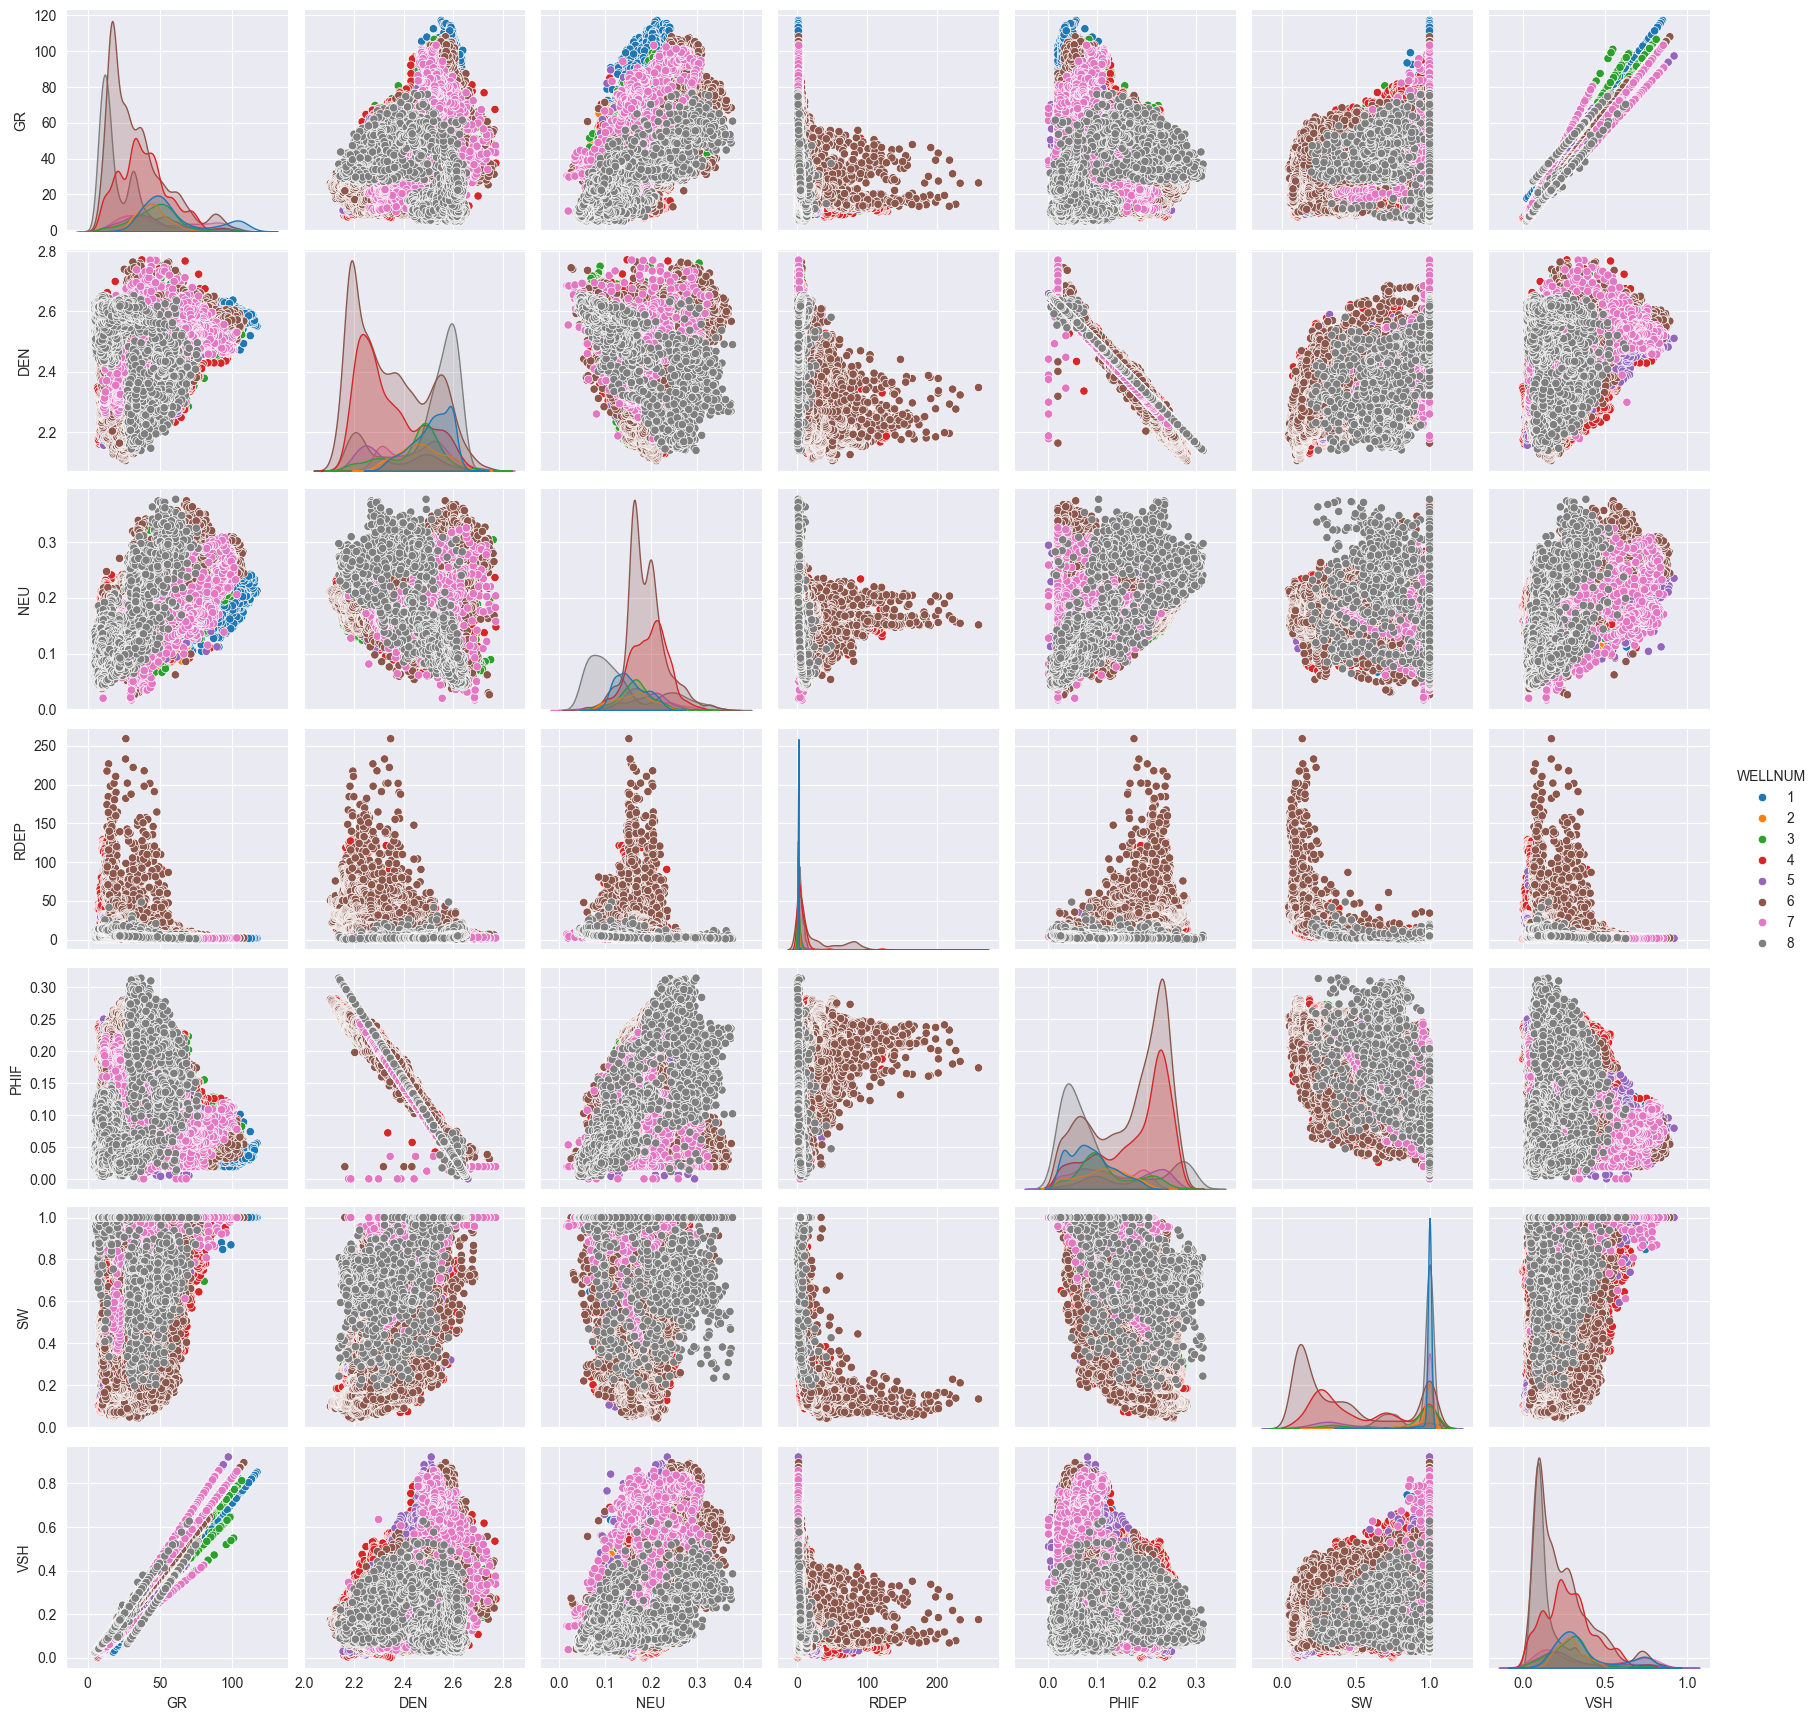

In [26]:
# another library from Seaborn to check the co-linearity
df_new = df1.copy()
df_new['WELLNUM'] = df1['WELLNUM'].astype('str')
sns.pairplot(df_new[['WELLNUM', 'GR', 'DEN', 'NEU', 'RDEP', 'PHIF', 'SW', 'VSH']], hue='WELLNUM')

## Build Machine Learning Models

### Identifying the Features and Targets

In [27]:
clf = IsolationForest(random_state=0).fit_predict(df1[col_names])
train = df1[clf==1]

y_train = df1[['PHIF', 'SW', 'VSH']]
X_train = df1[['DEN', 'GR', 'NEU', 'PEF', 'RDEP']]


### Training

In [28]:
from sklearn.pipeline import Pipeline
from catboost import CatBoostRegressor
from sklearn.multioutput import MultiOutputRegressor

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', MultiOutputRegressor(CatBoostRegressor(silent=True)))
])

parameters = {
    'regressor__estimator__iterations': [100, 200],
    'regressor__estimator__learning_rate': [0.1, 0.3],
    'regressor__estimator__depth': [4, 6]
}


grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring="r2")


grid_search.fit(X_train, y_train)

best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_

## Prediction

In [29]:
X_test = pd.read_csv("test.csv")
y_test = pd.read_csv("real_test_result.csv")

X_test.replace(['-9999', -9999], np.nan, inplace=True)

In [30]:
score = best_model.score(X_test[['DEN', 'GR', 'NEU', 'PEF', 'RDEP']], y_test)

print("Best parameters:", best_parameters)
print("Best R^2:", score)

Best parameters: {'regressor__estimator__depth': 4, 'regressor__estimator__iterations': 100, 'regressor__estimator__learning_rate': 0.1}
Best R^2: 0.8788351031096583


In [31]:
y_pred = best_model.predict(X_test[['DEN', 'GR', 'NEU', 'PEF', 'RDEP']])
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("RMSE: ", rmse)

RMSE:  0.09448264161767171
